In [ ]:
!nvidia-smi

Tue Mar  7 08:16:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Install Kaggle Library

In [1]:
!pip install -q kaggle

#Mouth Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Kaggle API

In [3]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c uwb-pose-prediction #download competition dataset

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9728        324  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           8199        201  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:26:03            699         42  1.0              
anas123siddiqui/mobiles                                    Mobiles                                      59KB  2023-02-18 16:3

In [4]:
!unzip -q /content/uwb-pose-prediction.zip

#DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
y_train = pd.read_csv("/content/annotations.csv")

# ตรวจสอบจำนวนข้อมูลในแต่ละคลาส
for class_label, count in y_train["class"].value_counts().items():
    print(f"Class {class_label}: {count}")

del class_label, count

# นำข้อมูลมาทำเป็น dict ตัวอย่าง "id" : "class"
y_train_dict = {}
for sclass,id in zip(y_train["class"],y_train["id"]):
    y_train_dict[id] = sclass

Class 6: 121
Class 4: 116
Class 3: 111
Class 5: 107
Class 1: 99
Class 0: 50
Class 2: 43


In [7]:
# ตรวจสอบรายละเอียดของข้อมูลตัวอย่าง
data = np.load('/content/train/train/001b0660-4c6e-4d07-8cd5-cd63578512f7.npy')
print("Data shape:", data.shape)
print("Data type:", data.dtype)
print("Class Data type:", y_train_dict["001b0660-4c6e-4d07-8cd5-cd63578512f7"] ) 

del data

Data shape: (2560, 56)
Data type: complex128
Class Data type: 2


In [8]:
#path
from pathlib import Path
path = Path("/content/train/train")

In [ ]:
new_columns_data = []
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    # stretched = np.transpose(data[:,:])
    new_columns_data.append(data)

df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'class'])

# del namenpy
# del new_columns_data

df

,id,data_in_file,class
0,80a8dc1d-b216-469c-91b1-fc257562a883,"[[0.012202567971195172, 0.007821743820105212, ...",0
1,3ab012da-927a-40d6-95f8-5a2f96dad360,"[[0.012186333646188048, 0.007765259713549852, ...",0
2,eef92f84-5127-4063-a4a2-fee4035b1ac7,"[[0.01198236827281207, 0.007601205018474889, 0...",0
3,8d562739-6502-4a6c-8b83-e029b795f685,"[[0.012418692718646231, 0.007921507902277426, ...",0
4,404c2e92-1101-4e62-83bf-a6fdb7dfcb9a,"[[0.01219113137799641, 0.007764052098562812, 0...",0
...,...,...,...
642,ea5513a7-f18a-4393-8ab4-44e574e70f2b,"[[0.011620293445918651, 0.0071988019798935035,...",4
643,edf4aec3-410d-4ed3-90d2-12671bb4c625,"[[0.011778157238745621, 0.007690166041238196, ...",4
644,297e1f02-66ac-4e4e-849a-da2f1103e8a0,"[[0.012107104116514944, 0.008053828546389809, ...",4
645,926418bb-2e66-4c82-82b1-13a82faf73b4,"[[0.011852193874462505, 0.007764038305035135, ...",4


In [ ]:
np.array(new_columns_data[0]).shape

(2560, 56)

In [ ]:
for idx, value in enumerate(new_columns_data):
  if value.shape[0] != 2560:
    print(idx,value.shape)

In [ ]:
new_columns_data[519] = new_columns_data[519][:2560]

In [ ]:
X = np.vstack(new_columns_data)
y = np.vstack(y_train["class"])
X.shape , y.shape

((1656320, 56), (647, 1))

In [ ]:
new_columns_data[0][0]

In [ ]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
642    4
643    4
644    4
645    4
646    4
Name: class, Length: 647, dtype: int64

#ML : Machine Learning

##MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier #4449
neural_network = (185, 92, 92, 48, 16)

ANN = MLPClassifier(max_iter=50 , activation='relu', learning_rate_init=0.1,solver='adam', alpha=1e-5,
                    hidden_layer_sizes=neural_network, random_state=42)
ANN.fit(X_train, y_train)

MLPClassifier(alpha=1e-05,
              hidden_layer_sizes=(4450, 6675, 4450, 2225, 4450, 3337, 1112, 560,
                                  69, 27),
              learning_rate_init=0.1, max_iter=50, random_state=42)

In [ ]:
[coef.shape for coef in ANN.coefs_]

[(8891, 4450),
 (4450, 6675),
 (6675, 4450),
 (4450, 2225),
 (2225, 4450),
 (4450, 3337),
 (3337, 1112),
 (1112, 560),
 (560, 69),
 (69, 27),
 (27, 7)]

In [ ]:
# Evaluate the performance of the model on the testing data
y_pred = ANN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.1346153846153846


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.48549323017408125


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

##SVM

In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

##DecisionTreeClassifier

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

In [ ]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=7000, n_features=4,n_informative=2, n_redundant=1,random_state=19, shuffle=False)
RandomForest = RandomForestClassifier(max_depth=190, random_state=19) #47
RandomForest.fit(X_train, y_train)

In [ ]:
y_pred = RandomForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

##MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

In [ ]:
y_pred = MNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## Predict Machine Learning

In [ ]:
#path
import pandas as pd
import numpy as np
from pathlib import Path
y_test = pd.read_csv("/content/sample_submission.csv")
path = Path("/content/test/test")

In [ ]:
new_columns_data = []
for namenpy in y_test["id"]:
    
    data = np.load(path / (namenpy + '.npy'))
    data = data.flatten().astype(float)
    window_size = 10000 #
    data_abs = np.abs(data)
    stretched = np.transpose(data_abs)
    smooth_data = np.convolve(stretched, np.ones(window_size)/window_size, mode='valid')
    shrunk_data = smooth_data[::15]
    new_columns_data.append(shrunk_data)

len(new_columns_data)


In [ ]:
y_pred = svm_clf.predict(new_columns_data)
y_pred

In [ ]:
y_pred = decision_tree.predict(new_columns_data)
y_pred

<ipython-input-111-3c58251e863c>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.flatten().astype(float)
<ipython-input-111-3c58251e863c>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_columns_data = np.array(new_columns_data)


,id,data_in_file,class
0,80a8dc1d-b216-469c-91b1-fc257562a883,"[0.0011546519404864218, 0.0011514434057931472,...",0
1,3ab012da-927a-40d6-95f8-5a2f96dad360,"[0.0010872161380009323, 0.0010851647115415503,...",0
2,eef92f84-5127-4063-a4a2-fee4035b1ac7,"[0.0011417296277893944, 0.0011367448791137751,...",0
3,8d562739-6502-4a6c-8b83-e029b795f685,"[0.0011804525676436925, 0.0011771609384086672,...",0
4,404c2e92-1101-4e62-83bf-a6fdb7dfcb9a,"[0.0010842839329784268, 0.0010857257480844232,...",0
...,...,...,...
642,ea5513a7-f18a-4393-8ab4-44e574e70f2b,"[0.0009996313740805742, 0.00099415163067327, 0...",4
643,edf4aec3-410d-4ed3-90d2-12671bb4c625,"[0.0009401322761291485, 0.0009484679713270029,...",4
644,297e1f02-66ac-4e4e-849a-da2f1103e8a0,"[0.0014574576230146287, 0.0014906835850483512,...",4
645,926418bb-2e66-4c82-82b1-13a82faf73b4,"[0.0010842526704817857, 0.0010745045268031616,...",4


ValueError: ignored

#Preprocess Image

In [ ]:
import os 
from pathlib import Path
path_del = Path("/content/drive/MyDrive/SuperAI/Signal/image_heatmap/Train")


In [ ]:
#ลบไฟล์
for i in os.listdir("/content/drive/MyDrive/SuperAI/Signal/image_heatmap/Train"):
  os.remove(path_del / i)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for idx,namenpy in enumerate(y_train["id"]):
    data = np.load(path / (namenpy + '.npy'))
    stretched = np.transpose(data)
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.imshow(stretched, cmap='hot', interpolation='nearest', aspect="auto")
    ax.axis('off')
    plt.savefig(f'/content/drive/MyDrive/SuperAI/Signal/image_heatmap/Train/{y_train["class"][idx]}/{namenpy}_heatmap.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

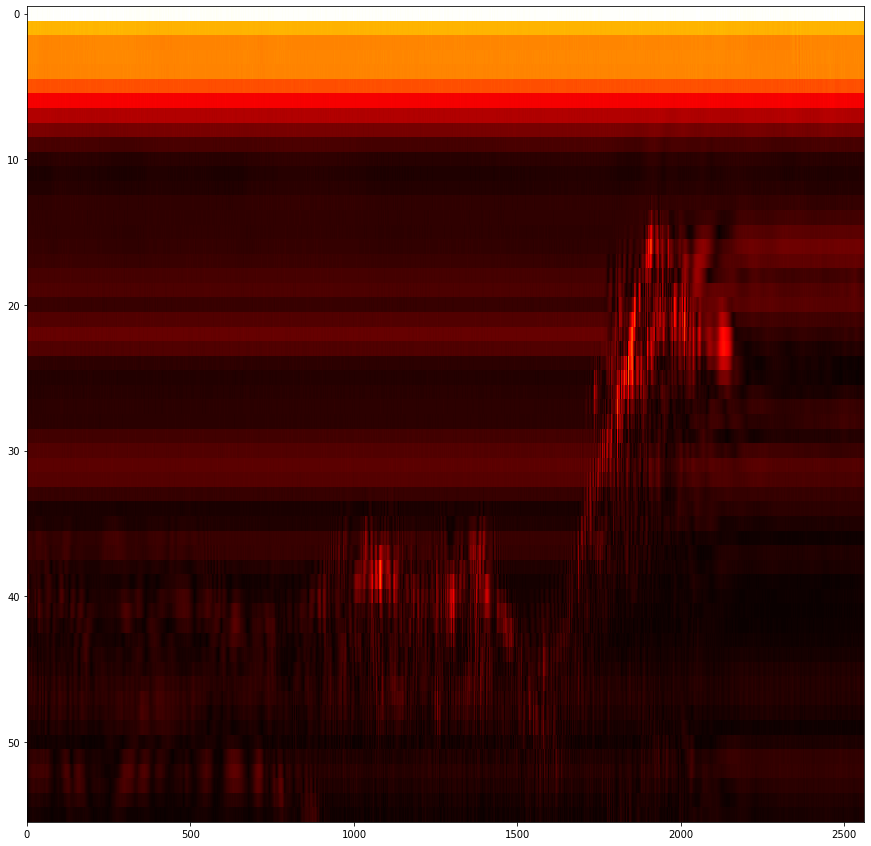

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
num = 0
data = np.load(f'/content/train/train/{df["id"][num]}.npy')

# Convert the data to absolute values
data_abs = np.abs(data)
stretched = np.transpose(data_abs)

# Plot the data as a heatmap
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(stretched, cmap='hot', interpolation='nearest', aspect="auto")
# plt.imshow(stretched, cmap='gray', aspect="auto")
# ax.axis('off')
# plt.savefig('heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


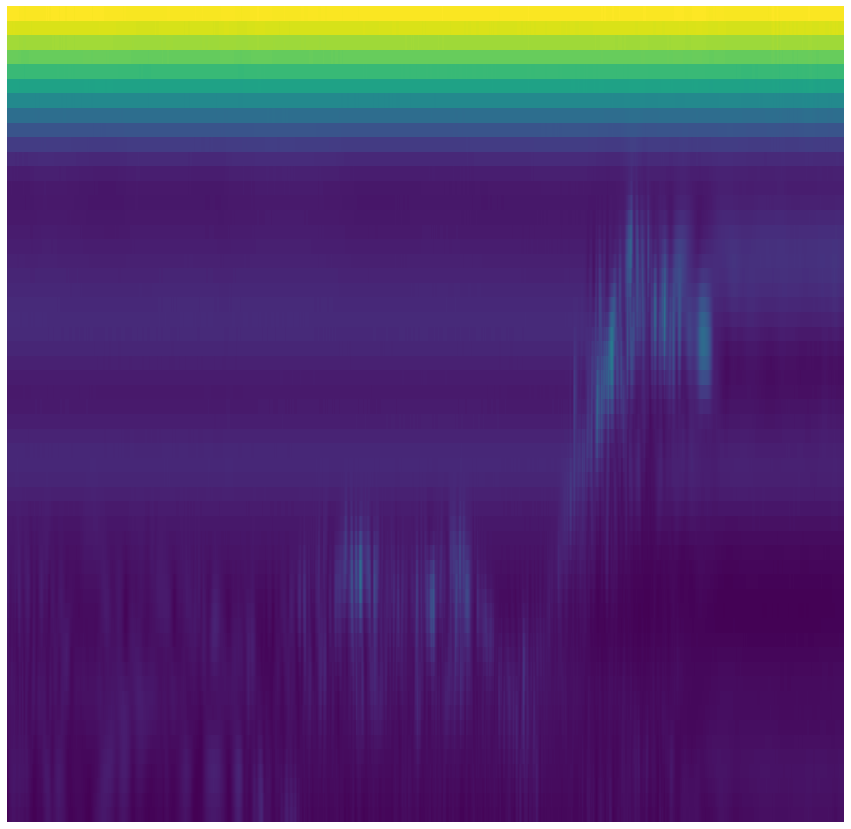

In [ ]:
from scipy.ndimage import gaussian_filter

# Load the .npy file
num = 0
data = np.load(f'/content/train/train/{df["id"][num]}.npy')

# Convert the data to absolute values
data_abs = np.abs(data)
stretched = np.transpose(data_abs)

# Define the parameters for the Gaussian filter
sigma = 2  # 1 Standard deviation of the Gaussian kernel

# Apply the Gaussian filter to the data
smoothed = gaussian_filter(stretched, sigma=sigma)

# Plot the smoothed data as a heatmap
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(smoothed,  interpolation='nearest', aspect="auto")

ax.axis('off')
# plt.savefig('heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


## load image to CNN

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import albumentations as A
from PIL import Image, ImageOps
import glob

data_file = pd.read_csv("/content/drive/MyDrive/SuperAI/Signal/image_heatmap/annotations.csv")
files = glob.glob("/content/drive/MyDrive/SuperAI/Signal/image_heatmap/Train/**/*.png", recursive=True)
data_dict = data_file.set_index('id')['class'].to_dict()
len(files)

In [ ]:
size = 144
data_image = []
y_train = []
for idx, name in enumerate(files):
  file_name = name.split("/")[-1].replace("_heatmap.png","")
  # print(data_dict[file_name])
  img = Image.open(name)
  img = ImageOps.pad(img, (size, size), centering=(0,0))
  image_array = np.array(img)
  data_image.append(image_array)
  y_train.append(data_dict[file_name])
  # img.show()
  # break

data_image = np.array(data_image)
Ytrain = np.array(y_train)
len(data_image)

646

In [ ]:
!pip install numpy>=1.20 typing-extensions>=4.2.0
!pip install -q tensorflow==2.4.1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split( data_image, Ytrain, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (516, 144, 144, 4)
y_train shape: (516,)
x_val shape: (130, 144, 144, 4)
y_val shape: (130,)


In [ ]:
x_train = x_train.reshape(-1, size, size, 4, 1)
x_val = x_val.reshape(-1, size, size, 4, 1)
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)

In [ ]:
x_train.shape, y_train.shape

((516, 144, 144, 4, 1), (516, 7))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, Dropout
from keras.optimizers import Adam

num_classes = 7

#CNN
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 4 , 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

#LSTM
lstm = Sequential()
lstm.add(TimeDistributed(cnn, input_shape=(None, size, size, 4 , 1)))
lstm.add(LSTM(128, return_sequences=True))
lstm.add(Dropout(0.5))
lstm.add(LSTM(64))
lstm.add(Dense(32, activation='relu'))
lstm.add(Dense(num_classes, activation='softmax'))

#Compile
opt = Adam(lr=0.001)
lstm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
# Train the model
history = lstm.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

In [ ]:
# Evaluate the model
test_loss, test_acc = lstm.evaluate(x_val, y_val)
print('Test accuracy:', test_acc)

#Graph

In [ ]:
#ตัวอย่างข้อมูล
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

num = 1
data = np.load(f'/content/train/train/{df["id"][num]}.npy')

# Smooth the signal using a Savitzky-Golay filter
window_size = 10
order = 9
# data_abs = np.abs(data)
stretched = np.transpose(data)
smoothed_data = savgol_filter(stretched, window_size, order)
plt.plot(smoothed_data/2, label='Smoothed Signal')
plt.show()


NameError: ignored

<ipython-input-43-e20d178098c5>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.flatten().astype(float)


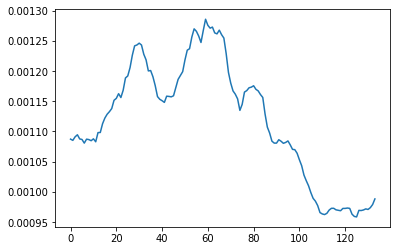

0


In [ ]:
#ตัวอย่างข้อมูล
import matplotlib.pyplot as plt
import numpy as np

num = 1
data = np.load(f'/content/train/train/{df["id"][num]}.npy')
data = data.flatten().astype(float)

window_size = 10000 #51
data_abs = np.abs(data)
stretched = np.transpose(data_abs)

smooth_data = np.convolve(stretched, np.ones(window_size)/window_size, mode='valid')

# mean_data = np.mean(smooth_data)
shrunk_data = smooth_data[::1000]
plt.plot(shrunk_data, label='Smoothed')
# plt.axhline(mean_data, color='r', label='Mean')
# plt.legend()
plt.show()

print(df["class"][num])

In [ ]:
shrunk_data.shape

(8891,)

##Graph Data Preprocess

#Spilt Data

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
labels = np.array(df["class"]) - 1
data = new_columns_data / np.max(new_columns_data[0])

num_classes = 6
Ytrain = to_categorical(labels, num_classes=num_classes)

In [ ]:
data[0].shape[0]

134

In [ ]:
for idx, value in enumerate(data):
  if value.shape[0] != 134:
    print(idx,value.shape)

519 (421,)


In [ ]:
data[519] = data[519][:134]

In [ ]:
X_train = np.vstack(data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split( X_train, Ytrain, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (517, 134)
y_train shape: (517, 6)
x_val shape: (130, 134)
y_val shape: (130, 6)


In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_val = np.expand_dims(x_val, axis=2)

In [ ]:
print(x_train.shape ,x_val.shape)

(517, 134, 1) (130, 134, 1)


#TRAIN MODEL

In [ ]:
del id ,data_abs , stretched

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Define the input shape
input_shape = (x_train.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_val, y_val))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout

model = Sequential()
model.add(LSTM(134, input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(GRU(64))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train,
                    validation_data=(x_val.reshape(x_val.shape[0], x_val.shape[1], 1), y_val),
                    epochs=10, batch_size=64)


Epoch 1/50
9/9 [==============================] - 6s 127ms/step - loss: 1.7553 - accuracy: 0.2437 - val_loss: 1.7401 - val_accuracy: 0.2538
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 1.7451 - accuracy: 0.2669 - val_loss: 1.7300 - val_accuracy: 0.2538
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 1.7390 - accuracy: 0.2669 - val_loss: 1.7496 - val_accuracy: 0.2538
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 1.7425 - accuracy: 0.2669 - val_loss: 1.7511 - val_accuracy: 0.2538
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 1.7384 - accuracy: 0.2669 - val_loss: 1.7438 - val_accuracy: 0.2538
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 1.7304 - accuracy: 0.2669 - val_loss: 1.7316 - val_accuracy: 0.2538
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 1.7277 - accuracy: 0.2669 - val_loss: 1.7269 - val_accuracy: 0.2538
Epoch 8/50
9/9 [==========

#DATA PREDICT

In [ ]:
y_predict = pd.read_csv("/content/sample_submission.csv")
y_predict

,id,class
0,30de3513-93ff-42d8-ad5f-4c93f4a4444c,6.0
1,84e55af1-ae63-4b06-b650-1136d38b691e,4.0
2,2471a7eb-af35-4ae7-870e-6650de9f0c2f,2.0
3,d00e8bdc-79af-4e55-b25a-96ea589b6420,NaN
4,ad9f77bc-5ab6-477d-b760-2f3fc65c14d3,NaN
...,...,...
159,5fce955d-1068-40b3-afc3-111f8c22c9f9,NaN
160,f3a000be-07c9-44ad-8ff0-b89a9a1070dd,NaN
161,84d3963b-cfed-450c-88ab-ca853273d15c,NaN
162,7b36184c-5541-44d9-9200-8057bd3cf4ef,NaN


In [ ]:
#path
from pathlib import Path
path = Path("/content/test/test")

In [ ]:
data_predict = []
for namenpy in y_predict["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    stretched = np.transpose(data[:,:])
    data_predict.append(stretched)

df_pre = y_predict.assign(data_in_file=data_predict)
df_pre = df_pre.reindex(columns= ['id', 'data_in_file' ,'class'])
df_pre

,id,data_in_file,class
0,30de3513-93ff-42d8-ad5f-4c93f4a4444c,"[[0.011824504373720889, 0.01181215138279343, 0...",6.0
1,84e55af1-ae63-4b06-b650-1136d38b691e,"[[0.011809872859332268, 0.011830427554175736, ...",4.0
2,2471a7eb-af35-4ae7-870e-6650de9f0c2f,"[[0.012163430289117682, 0.012156186665010347, ...",2.0
3,d00e8bdc-79af-4e55-b25a-96ea589b6420,"[[0.011963321558994785, 0.011997065541440066, ...",NaN
4,ad9f77bc-5ab6-477d-b760-2f3fc65c14d3,"[[0.011862989656902965, 0.011867217483443132, ...",NaN
...,...,...,...
159,5fce955d-1068-40b3-afc3-111f8c22c9f9,"[[0.011748556582033266, 0.0117290780820416, 0....",NaN
160,f3a000be-07c9-44ad-8ff0-b89a9a1070dd,"[[0.011926361304467113, 0.011918729108564794, ...",NaN
161,84d3963b-cfed-450c-88ab-ca853273d15c,"[[0.011780068181288683, 0.011758610311177494, ...",NaN
162,7b36184c-5541-44d9-9200-8057bd3cf4ef,"[[0.012090818204980439, 0.01208165725836804, 0...",NaN


In [ ]:
# Reshape the data to have the same shape
max_shape = np.max([x.shape for x in df_pre["data_in_file"]], axis=0)
data = np.zeros((len(df_pre), max_shape[0], max_shape[1]), dtype=np.float32)
for i, x in enumerate(df_pre["data_in_file"]):
    data[i, :x.shape[0], :x.shape[1]] = x

# Normalize the data to [0, 1]
data = data / np.max(data)

In [ ]:
data.shape

(164, 56, 2560, 1)

In [ ]:
data = np.expand_dims(data, axis=-1)

#PREDICT

In [ ]:
new_columns_data = []
for namenpy in y_train["id"]:
    data = np.load(path / (namenpy + '.npy'))
    data = data.flatten().astype(float)
    window_size = 10000 #51
    data_abs = np.abs(data)
    stretched = np.transpose(data_abs)
    smooth_data = np.convolve(stretched, np.ones(window_size)/window_size, mode='valid')
    shrunk_data = smooth_data[::1000]
    new_columns_data.append(np.array(shrunk_data))
    
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'class'])
new_columns_data = np.array(new_columns_data)
# del namenpy
# del new_columns_data

df

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, TimeDistributed, LSTM, Dense, Dropout
from keras.optimizers import Adam

num_classes = 7

model = Sequential()
model.add(Conv3D(filters=32, kernel_size=3, activation='relu', input_shape=(size, size, 4)))
model.add(MaxPooling3D(pool_size=(2, 2)))
model.add(Conv3D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2)))
model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))



##score

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(data)

# Convert the predictions to class labels
# y_pred_labels = np.argmax(y_pred, axis=1)

#SAVE SUBMISSION

In [ ]:
df_submission = pd.read_csv("/content/sample_submission.csv")
df_submission

,id,class
0,30de3513-93ff-42d8-ad5f-4c93f4a4444c,6.0
1,84e55af1-ae63-4b06-b650-1136d38b691e,4.0
2,2471a7eb-af35-4ae7-870e-6650de9f0c2f,2.0
3,d00e8bdc-79af-4e55-b25a-96ea589b6420,NaN
4,ad9f77bc-5ab6-477d-b760-2f3fc65c14d3,NaN
...,...,...
159,5fce955d-1068-40b3-afc3-111f8c22c9f9,NaN
160,f3a000be-07c9-44ad-8ff0-b89a9a1070dd,NaN
161,84d3963b-cfed-450c-88ab-ca853273d15c,NaN
162,7b36184c-5541-44d9-9200-8057bd3cf4ef,NaN


In [ ]:
import random

for index, row in df_submission.iterrows():
  if index > 2:
    df_submission["class"][index] = ""

<ipython-input-41-fc6125c63d38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission["class"][index] = str(random.randint(0, 6))


In [ ]:
df_submission

,id,class
0,30de3513-93ff-42d8-ad5f-4c93f4a4444c,6.0
1,84e55af1-ae63-4b06-b650-1136d38b691e,4.0
2,2471a7eb-af35-4ae7-870e-6650de9f0c2f,2.0
3,d00e8bdc-79af-4e55-b25a-96ea589b6420,6.0
4,ad9f77bc-5ab6-477d-b760-2f3fc65c14d3,5.0
...,...,...
159,5fce955d-1068-40b3-afc3-111f8c22c9f9,5.0
160,f3a000be-07c9-44ad-8ff0-b89a9a1070dd,6.0
161,84d3963b-cfed-450c-88ab-ca853273d15c,6.0
162,7b36184c-5541-44d9-9200-8057bd3cf4ef,6.0


In [ ]:
df_submission = pd.read_csv("/content/Submission.csv")
df_submission

,id,class
0,30de3513-93ff-42d8-ad5f-4c93f4a4444c,6.0
1,84e55af1-ae63-4b06-b650-1136d38b691e,4.0
2,2471a7eb-af35-4ae7-870e-6650de9f0c2f,2.0
3,d00e8bdc-79af-4e55-b25a-96ea589b6420,3.0
4,ad9f77bc-5ab6-477d-b760-2f3fc65c14d3,5.0
...,...,...
159,5fce955d-1068-40b3-afc3-111f8c22c9f9,4.0
160,f3a000be-07c9-44ad-8ff0-b89a9a1070dd,3.0
161,84d3963b-cfed-450c-88ab-ca853273d15c,0.0
162,7b36184c-5541-44d9-9200-8057bd3cf4ef,3.0


#Submission to Kaggle

submit from local

In [ ]:
!kaggle competitions submit -c uwb-pose-prediction -f /content/Submission.csv -m "CNN Overfiting time 2"

100% 6.25k/6.25k [00:03<00:00, 1.74kB/s]
400 - Bad Request


##submit from gdrive

In [ ]:
X_pca.shape

(647, 100)

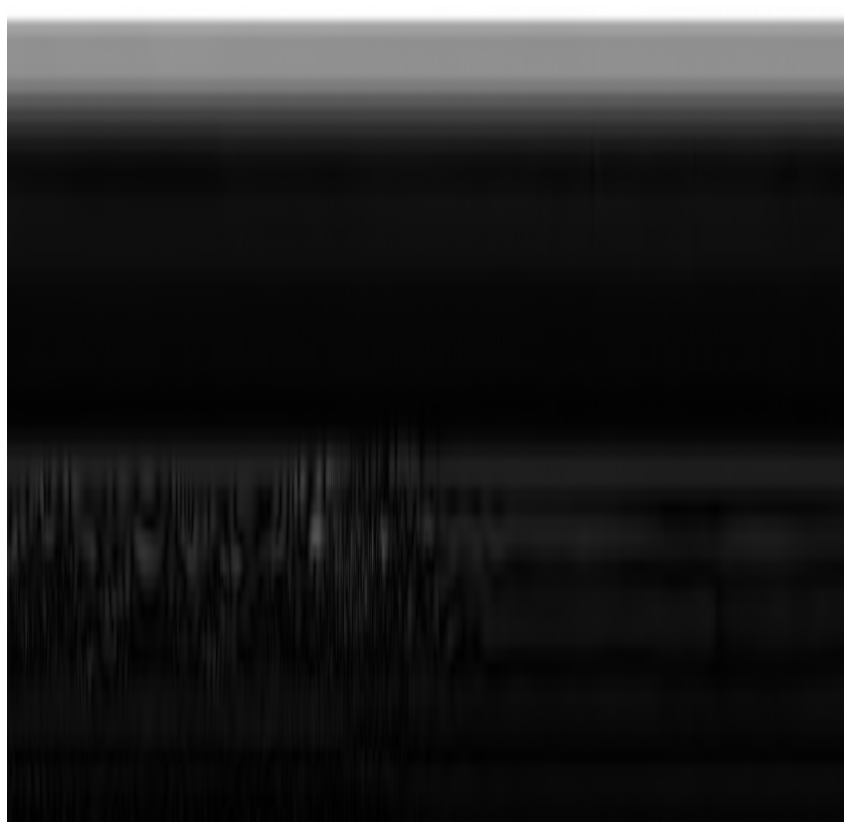

0


In [ ]:
num = 13
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(df["data_in_file"][num], cmap='gray', aspect="auto")
ax.axis('off')
plt.show()

print(df["class"][num])

In [ ]:
#path
import pandas as pd
import numpy as np
from pathlib import Path
y_train = pd.read_csv("/content/annotations.csv")
path = Path("/content/train/train")

In [ ]:
new_columns_data = []
for namenpy in y_train["id"]:
    data = np.load(path / (namenpy + '.npy'))
    data = data.flatten().astype(float)
    window_size = 10000 #
    data_abs = np.abs(data)
    stretched = np.transpose(data_abs)
    smooth_data = np.convolve(stretched, np.ones(window_size)/window_size, mode='valid')
    shrunk_data = smooth_data[::1000]
    new_columns_data.append(shrunk_data)

df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'class'])

# del namenpy
# del new_columns_data
df

<ipython-input-2-8cc66c1539b9>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.flatten().astype(float)


,id,data_in_file,class
0,80a8dc1d-b216-469c-91b1-fc257562a883,"[0.0011546519404864218, 0.0011509351616813936,...",0
1,3ab012da-927a-40d6-95f8-5a2f96dad360,"[0.0010872161380009323, 0.0010831964103539384,...",0
2,eef92f84-5127-4063-a4a2-fee4035b1ac7,"[0.0011417296277893944, 0.001138153311570662, ...",0
3,8d562739-6502-4a6c-8b83-e029b795f685,"[0.0011804525676436925, 0.0011764742750635152,...",0
4,404c2e92-1101-4e62-83bf-a6fdb7dfcb9a,"[0.0010842839329784268, 0.0010806790509687502,...",0
...,...,...,...
642,ea5513a7-f18a-4393-8ab4-44e574e70f2b,"[0.0009996313740805742, 0.0009960191618430072,...",4
643,edf4aec3-410d-4ed3-90d2-12671bb4c625,"[0.0009401322761291485, 0.0009366407529717012,...",4
644,297e1f02-66ac-4e4e-849a-da2f1103e8a0,"[0.0014574576230146287, 0.0014507804993837037,...",4
645,926418bb-2e66-4c82-82b1-13a82faf73b4,"[0.0010842526704817857, 0.0010801428821330802,...",4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['data_in_file'], df['class'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape) #(517,) (130,)


(465,) (52,)


In [ ]:
# Stack the arrays vertically
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(465, 8891)
(52, 8891)


#Research : Filtering Data Bins of UWB Radars for Activity Recognition with Random Forest

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from scipy import signal

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")
y_train = y_train.rename(columns={'class': 'target'})

new_columns_data = []
fs = 50  # Sample rate
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    lowcut = 20
    highcut = 80
    b, a = signal.butter(2, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))
    new_columns_data.append(data)
new_columns_data[519] = new_columns_data[519][:2560]
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'target'])

# Select the top 4000 features using chi2 test
X = np.array(new_columns_data).reshape(647, -1)
selector = SelectKBest(score_func=chi2, k=45000)
X_new = selector.fit_transform(X, y_train["target"])

Y = y_train["target"]
# Apply PCA to reduce the number of features
n_components = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_new)

    # Split the data into training, validation, and test sets
    X_train, X_test, y_train_target, y_test_target = train_test_split(X_pca, y_train["target"], test_size=0.2, random_state=0)
    # X_train, X_val, y_train_target, y_val_target = train_test_split(X_train, y_train_target, test_size=0.2, random_state=0)
    neural_network = (n, n*2, n//3,10)
    clf = MLPClassifier(max_iter=300 , activation='relu', learning_rate_init=0.001,solver='adam', alpha=1e-5,
                    hidden_layer_sizes=neural_network, random_state=42)
    # Train a Multi-layer Perceptron Classifier
    clf.fit(X_train, y_train_target)

    # Evaluate the model's accuracy on the validation set
    test_accuracy = clf.score(X_test, y_test_target)
    print(f"Test accuracy with {n} principal components: {test_accuracy:.4f}")



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 10 principal components: 0.2077
Test accuracy with 20 principal components: 0.1615


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 30 principal components: 0.2846


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 40 principal components: 0.2615


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 50 principal components: 0.3231


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 60 principal components: 0.3000


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 70 principal components: 0.2846


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 80 principal components: 0.3231


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy with 90 principal components: 0.2462
Test accuracy with 100 principal components: 0.2923


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import signal

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")

new_columns_data = []
fs = 1000  # Sample rate
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    lowcut = 20
    highcut = 80
    b, a = signal.butter(2, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))
    new_columns_data.append(data)
new_columns_data[519] = new_columns_data[519][:2560]
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'class'])

# Select the top 4000 features using chi2 test
X = np.array(new_columns_data).reshape(647, -1)
selector = SelectKBest(score_func=chi2, k=4000)
X_new = selector.fit_transform(X, y_train["class"])

Y = y_train["class"]
# Apply PCA to reduce the number of features
n_components = [10,11,12,13,14,15,16,17,18,19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_new)

    # Split the data into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y , test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train a Random Forest Classifier with 100 trees
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)

    # Evaluate the model's accuracy on the validation set
    val_accuracy = clf.score(X_val, y_val)
    print(f"Validation accuracy with {n} principal components: {val_accuracy:.4f}")

    # Evaluate the model's accuracy on the test set
    test_accuracy = clf.score(X_test, y_test)
    print(f"Test accuracy with {n} principal components: {test_accuracy:.4f}")



In [41]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import signal
from scipy.ndimage import gaussian_filter


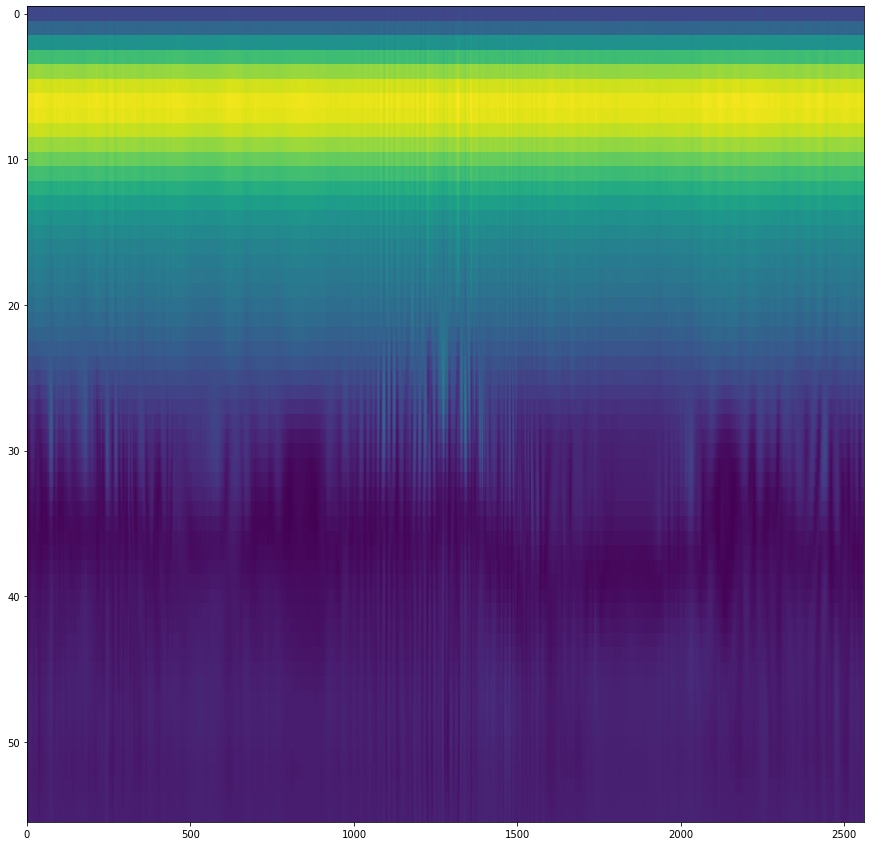

In [152]:
path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")

fs = 12
lowcut = 0.1
highcut = 0.9

# for namenpy in y_train["id"]:
    # data = np.abs(np.load(path / (namenpy + '.npy')))

    # b, a = signal.butter(2, [lowcut / (0.5* fs), highcut / (0.5*fs)], 'band')
    # data = np.abs(signal.filtfilt(b, a, data))

    # data_abs = np.abs(data)
    # stretched = np.transpose(data)
    # break

num = 10
data = np.load(f'/content/train/train/{y_train["id"][num]}.npy')

b, a = signal.butter(2, [lowcut / (0.5* fs), highcut / (0.5*fs)], 'band')
data = np.abs(signal.filtfilt(b, a, data))

data_abs = np.abs(data)
stretched = np.transpose(data)

sigma = 1.5  # 1 Standard deviation of the Gaussian kernel
smoothed = gaussian_filter(stretched, sigma=sigma)

# Plot the data as a heatmap
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(smoothed,cmap='viridis', interpolation='nearest', aspect="auto")
plt.show()



###save train image path

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")

sigma = 1  # 1 Standard deviation of the Gaussian kernel
lowcut = 20
highcut = 30
fs = 100
for idx,namenpy in enumerate(y_train["id"]):
    if idx % 50 == 0:
      print(idx)
    data = np.load(path / (namenpy + '.npy'))

    b, a = signal.butter(2, [lowcut / (0.5* fs), highcut / (0.5*fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))

    data_abs = np.abs(data)
    stretched = np.transpose(data)
    # smoothed = gaussian_filter(stretched, sigma=sigma)
    plt.imshow(stretched, interpolation='nearest', aspect="auto")
    ax.axis('off')
    plt.savefig(f'/content/drive/MyDrive/SuperAI/Signal/image_Research/train/{y_train["class"][idx]}/{namenpy}_heatmap_sm.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

###save test image path

0


KeyboardInterrupt: ignored

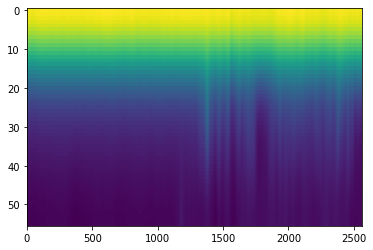

In [135]:
import numpy as np
import matplotlib.pyplot as plt

path = Path("/content/test/test")
y_test = pd.read_csv("/content/sample_submission.csv")

sigma = 1  # 1 Standard deviation of the Gaussian kernel
lowcut = 20
highcut = 30
fs = 100
for idx,namenpy in enumerate(y_test["id"]):
    if idx % 30 == 0:
      print(idx)
    data = np.load(path / (namenpy + '.npy'))

    b, a = signal.butter(2, [lowcut / (0.5* fs), highcut / (0.5*fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))

    data_abs = np.abs(data)
    stretched = np.transpose(data)
    smoothed = gaussian_filter(stretched, sigma=sigma)

    plt.imshow(smoothed, interpolation='nearest', aspect="auto")
    ax.axis('off')
    plt.savefig(f'/content/drive/MyDrive/SuperAI/Signal/image_Research/test/{namenpy}.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

TypeError: ignored

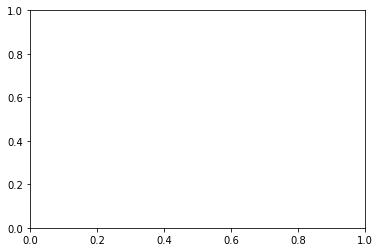

In [126]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot of Transformed Data')
plt.show()


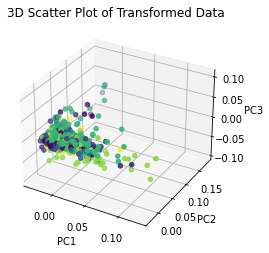

In [116]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of Transformed Data')
plt.show()


##RandomForestClassifier

In [145]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import signal

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")
y_train = y_train.rename(columns={'class': 'target'})

new_columns_data = []
fs = 12  # 1000
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    lowcut = 0.1 #20
    highcut = 0.9 #80
    b, a = signal.butter(2, [lowcut / (0.5*fs), highcut / (0.5*fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))
    new_columns_data.append(data)
new_columns_data[519] = new_columns_data[519][:2560]
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'target'])

X = np.array(new_columns_data).reshape(647, -1)
selector = SelectKBest(score_func=chi2, k=4500) #4000
X_new = selector.fit_transform(X, y_train["target"])
Y = y_train["target"]

n_components = [5,10,15,20,25,30,35,40,45,50]
clf = RandomForestClassifier(n_estimators=100)

for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

    # Train a Random Forest Classifier with 100 trees
    clf.fit(X_train, y_train)

    test_accuracy = clf.score(X_test, y_test)
    print(f"Test accuracy with {n} principal components: {test_accuracy:.4f}")



Test accuracy with 5 principal components: 0.3846
Test accuracy with 10 principal components: 0.3385
Test accuracy with 15 principal components: 0.3231
Test accuracy with 20 principal components: 0.3462
Test accuracy with 25 principal components: 0.3692
Test accuracy with 30 principal components: 0.3462
Test accuracy with 35 principal components: 0.3692
Test accuracy with 40 principal components: 0.3077
Test accuracy with 45 principal components: 0.3385
Test accuracy with 50 principal components: 0.3154


##SVM

In [85]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import signal
from sklearn import svm

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")
y_train = y_train.rename(columns={'class': 'target'})

new_columns_data = []
fs = 900  # 1000
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    lowcut = 25 #20
    highcut = 150 #80
    b, a = signal.butter(2, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))
    new_columns_data.append(data)
new_columns_data[519] = new_columns_data[519][:2560]
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'target'])

X = np.array(new_columns_data).reshape(647, -1)
selector = SelectKBest(score_func=chi2, k=10000) #4000
X_new = selector.fit_transform(X, y_train["target"])
Y = y_train["target"]

n_components = [5,10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

    clf = svm.SVC()
    clf.fit(X_train, y_train)

    test_accuracy = clf.score(X_test, y_test)
    print(f"Test accuracy with {n} principal components: {test_accuracy:.4f}")



Test accuracy with 5 principal components: 0.3615
Test accuracy with 10 principal components: 0.3692
Test accuracy with 15 principal components: 0.3615
Test accuracy with 20 principal components: 0.4000
Test accuracy with 25 principal components: 0.3769
Test accuracy with 30 principal components: 0.3692
Test accuracy with 40 principal components: 0.3769
Test accuracy with 50 principal components: 0.3462
Test accuracy with 60 principal components: 0.3462
Test accuracy with 70 principal components: 0.3308
Test accuracy with 80 principal components: 0.3231
Test accuracy with 90 principal components: 0.3308
Test accuracy with 100 principal components: 0.3308


##DecisionTreeClassifier

In [86]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import signal
from sklearn import tree

path = Path("/content/train/train")
y_train = pd.read_csv("/content/annotations.csv")
y_train = y_train.rename(columns={'class': 'target'})

new_columns_data = []
fs = 900  # 1000
for namenpy in y_train["id"]:
    data = np.abs(np.load(path / (namenpy + '.npy')))
    lowcut = 25 #20
    highcut = 150 #80
    b, a = signal.butter(2, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], 'band')
    data = np.abs(signal.filtfilt(b, a, data))
    new_columns_data.append(data)
new_columns_data[519] = new_columns_data[519][:2560]
df = y_train.assign(data_in_file=new_columns_data)
df = df.reindex(columns= ['id', 'data_in_file' ,'target'])

X = np.array(new_columns_data).reshape(647, -1)
selector = SelectKBest(score_func=chi2, k=10000) #4000
X_new = selector.fit_transform(X, y_train["target"])
Y = y_train["target"]

n_components = [5,10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    test_accuracy = clf.score(X_test, y_test)
    print(f"Test accuracy with {n} principal components: {test_accuracy:.4f}")



Test accuracy with 5 principal components: 0.2538
Test accuracy with 10 principal components: 0.3308
Test accuracy with 15 principal components: 0.3154
Test accuracy with 20 principal components: 0.3154
Test accuracy with 25 principal components: 0.3077
Test accuracy with 30 principal components: 0.3308
Test accuracy with 40 principal components: 0.2846
Test accuracy with 50 principal components: 0.3154
Test accuracy with 60 principal components: 0.3154
Test accuracy with 70 principal components: 0.3231
Test accuracy with 80 principal components: 0.2923
Test accuracy with 90 principal components: 0.2462
Test accuracy with 100 principal components: 0.2846


#model Ensemble

##sklearn

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define 3 classifiers to use in the ensemble
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = SVC(probability=True, random_state=1)

# Combine the classifiers in the ensemble model
ensemble = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')

# Fit the ensemble model to training data
ensemble.fit(X_train, y_train)

# Use the ensemble model to make predictions on new data
y_pred = ensemble.predict(X_test)


##tensorflow

In [ ]:
import tensorflow as tf

# Define the input layer
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Define the first model
model1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
model1 = tf.keras.layers.Dense(64, activation='relu')(model1)
model1 = tf.keras.layers.Dense(64, activation='relu')(model1)
model1 = tf.keras.layers.Dense(1, activation='sigmoid')(model1)

# Define the second model
model2 = tf.keras.layers.Dense(64, activation='relu')(inputs)
model2 = tf.keras.layers.Dense(64, activation='relu')(model2)
model2 = tf.keras.layers.Dense(64, activation='relu')(model2)
model2 = tf.keras.layers.Dense(1, activation='sigmoid')(model2)

# Define the third model
model3 = tf.keras.layers.Dense(64, activation='relu')(inputs)
model3 = tf.keras.layers.Dense(64, activation='relu')(model3)
model3 = tf.keras.layers.Dense(64, activation='relu')(model3)
model3 = tf.keras.layers.Dense(1, activation='sigmoid')(model3)

# Combine the predictions from the three models
ensemble_outputs = tf.keras.layers.average([model1, model2, model3])

# Define the ensemble model
ensemble_model = tf.keras.Model(inputs=inputs, outputs=ensemble_outputs)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Use the ensemble model to make predictions
y_pred = ensemble_model.predict(X_test)
